In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def HenonFn(x, y, a, b):
    xnew = 1 - a*x*x + y
    ynew = b*x
    return (xnew, ynew)

In [3]:
def HenonTangentFn(x, y, dx, dy, a, b):
    dxnew = -2*a*x*dx + dy
    dynew = b*dx
    return (dxnew, dynew)

In [4]:
def MyTSGen(RecCounter, RecUpperLim, TS_Len, a, b):
    RecCounter = RecCounter+1 #counts # times recursion function has been called.
    if RecCounter<RecUpperLim:
        n = 0 #counter for length of TS.
        xTS = [np.random.uniform(-2, 2)]
        yTS = [np.random.uniform(-2, 2)]
        xn, yn = xTS[-1], yTS[-1]
        
        while n<TS_Len-1:
            n = n+1
            xn, yn = HenonFn(xTS[n-1], yTS[n-1], a, b)
            xTS.append(xn)
            yTS.append(yn)
            #---
            if abs(xn)>2.5:
                #print (RecCounter, len(AllTS))
                RecCounter, xTS, yTS = MyTSGen(RecCounter, RecUpperLim, TS_Len, a, b)
                break
            #---
        return(RecCounter, xTS, yTS)

In [5]:
# Parameter values:
a_start, a_stop = 0.0, 1.4
N_a = 501
a_List = np.linspace(a_start, a_stop, N_a)
b = 0.3

In [6]:
dis = 5000
N = 10000

In [7]:
%%time

Lyap1_List = []
Lyap2_List = []

for a in a_List:
    RecUpperLim = 100
    
    RecCounter = 0
    RecCounter, xTS_temp, yTS_temp = MyTSGen(RecCounter, RecUpperLim, dis+N, a, b)
    
    #print(RecCounter)
    
    # Fiducial trajectory:
    xTS = xTS_temp[dis:]
    yTS = yTS_temp[dis:]
    
    # Initialize lyap exp:
    Lyap1 = 0.0
    Lyap2 = 0.0
    
    # Initialize unit circle:
    e1 = np.array([1.0, 0.0])
    e2 = np.array([0.0, 1.0])
    
    for jj in range(N):
        x = xTS[jj]
        y = yTS[jj]
        
        # Evolve unit circle:
        e1[0], e1[1] = HenonTangentFn(x, y, e1[0], e1[1], a, b)
        e2[0], e2[1] = HenonTangentFn(x, y, e2[0], e2[1], a, b)
        
        # GSR:
        norm1 = np.sqrt(np.dot(e1, e1))
        e1 = e1/norm1
        
        dot_product = np.dot(e1, e2)
        e2 = e2 - dot_product*e1
        
        norm2 = np.sqrt(np.dot(e2, e2))
        e2 = e2/norm2
        
        # Increment Lyapunov sum:
        Lyap1 += np.log2(norm1)
        Lyap2 += np.log2(norm2)
    
    Lyap1 = (1.0/N)*Lyap1
    Lyap2 = (1.0/N)*Lyap2
    
    Lyap1_List.append(Lyap1)
    Lyap2_List.append(Lyap2)

CPU times: user 1min 46s, sys: 546 ms, total: 1min 46s
Wall time: 1min 46s


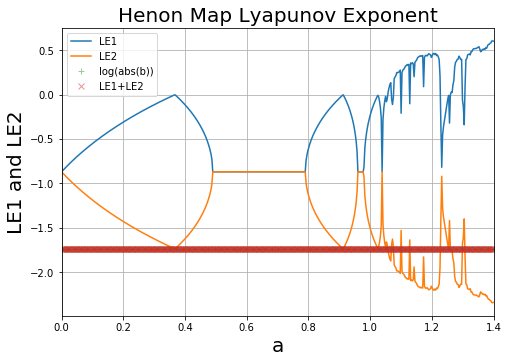

In [8]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(a_List, Lyap1_List, label="LE1")
ax.plot(a_List, Lyap2_List, label="LE2")

ax.plot(a_List, [np.log2(np.abs(b))]*N_a, "+", label="log(abs(b))", alpha=0.5)
ax.plot(a_List, np.array(Lyap1_List) + np.array(Lyap2_List), "x", label="LE1+LE2", alpha=0.5)

ax.set_xlim([a_start, a_stop])

ax.set_xlabel("a", fontsize=20)
ax.set_ylabel("LE1 and LE2", fontsize=20)
ax.set_title("Henon Map Lyapunov Exponent", fontsize=20)

ax.grid()
plt.legend()
plt.show()